In [1]:
import pandas as pd

In [2]:
ts = pd.read_csv('/Users/shivasagar/Downloads/DATA_SCIENCE/Machine Learning/ML Live/Time Series Forecasting/AirPassengers.csv', squeeze = True)

In [3]:
ts.head()

,Year-Month,International Airlines Pax
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
ts.dtypes

Year-Month                    object
International Airlines Pax     int64
dtype: object

In [6]:
pd.datetime.strptime('1949-01' , '%Y-%m')

/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


datetime.datetime(1949, 1, 1, 0, 0)

In [7]:
ts['Year-Month']=ts['Year-Month'].apply(lambda dates : pd.datetime.strptime(dates , '%Y-%m'))

/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [8]:
ts1 = pd.read_csv('/Users/shivasagar/Downloads/DATA_SCIENCE/Machine Learning/ML Live/Time Series Forecasting/AirPassengers.csv', parse_dates = ['Year-Month'],index_col = 0, squeeze = True,  
                 date_parser = lambda dates : pd.datetime.strptime(dates , '%Y-%m'))

/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [9]:
ts1.head()

Year-Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: International Airlines Pax, dtype: int64

In [10]:
import matplotlib.pyplot as plt

In [11]:
import warnings 
warnings.filterwarnings('ignore')

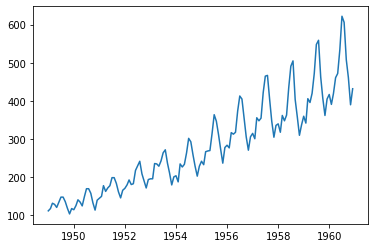

In [12]:
plt.plot(ts1)
plt.show()

In [13]:
ts2 = pd.read_csv('champagne.csv', parse_dates = ['Month'],index_col = 0, squeeze = True,  
                date_parser = lambda dates : pd.datetime.strptime(dates , '%Y-%m'))

In [14]:
ts2.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Monthly Champagne Sales, dtype: int64

In [15]:
ts2.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

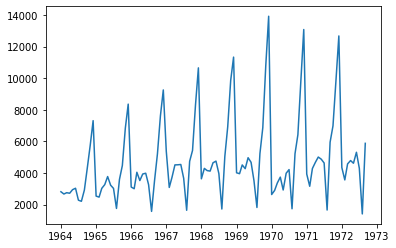

In [16]:
plt.plot(ts2)
plt.show()

# Seasonality

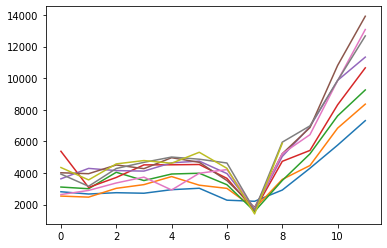

In [17]:
#f,a = plt.subplots(1,9, figsize = (10,5))
for i in (range(1964,1973)):
    x = list(ts2[str(i)])
    plt.plot(x)
plt.show()

# Trend

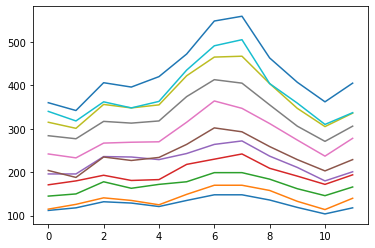

In [18]:
for i in (range(1949,1960)):
    x = list(ts1[str(i)])
    plt.plot(x)
plt.show()

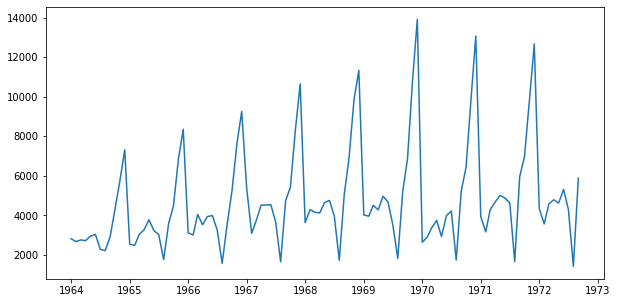

In [19]:
plt.figure(figsize = (10,5))
plt.plot(ts2)
plt.show()

# Is there a trend ???             No
# Is there seasonlaity ??         Yes
# Are there outliers ??           No
# Is there any abrupt change in the level?? No

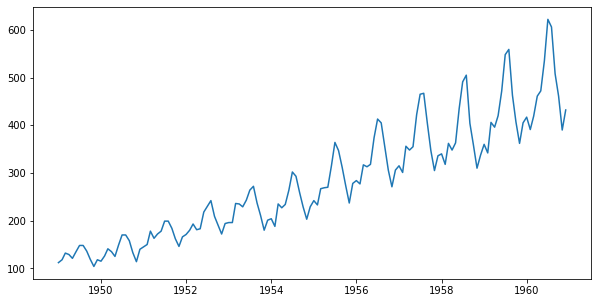

In [20]:
plt.figure(figsize = (10,5))
plt.plot(ts1)
plt.show()

In [42]:
ts3 = pd.read_csv('/Users/shivasagar/Downloads/DATA_SCIENCE/Machine Learning/ML Live/Time Series Forecasting/Clay Bricks.csv'
                     ,parse_dates = ['Month'],index_col = 0, squeeze = True,  
                date_parser = lambda dates : pd.datetime.strptime(dates , '%Y-%m') )


In [43]:
ts3.head()

Month
1956-01-01    53
1956-02-01    68
1956-03-01    68
1956-04-01    66
1956-05-01    72
Name: Production of Clay Bricks, dtype: int64

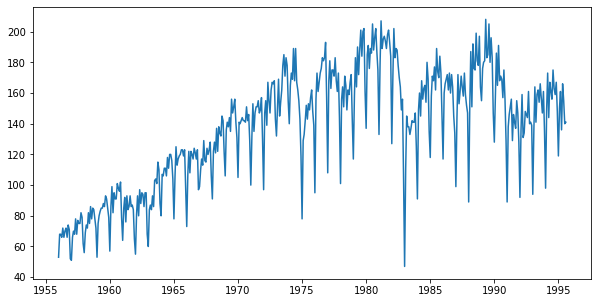

In [44]:
plt.figure(figsize = (10,5))
plt.plot(ts3)
plt.show()

## Rolling Statistics : rolling mean, rolling std

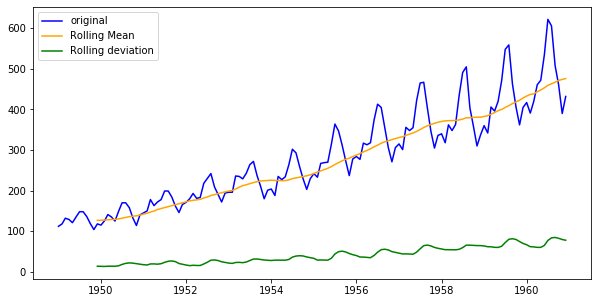

In [45]:
rol_mean = ts1.rolling(window = 12).mean()
rol_std = ts1.rolling(window = 12).std()

plt.figure(figsize = (10,5))
plt.plot(ts1, color = 'blue', label = 'original')
plt.plot(rol_mean, color = 'orange', label = 'Rolling Mean')
plt.plot(rol_std, color = 'green', label = 'Rolling deviation')
plt.legend(loc = 'best')
plt.show()

# Dickey - Fuller test  : Null Hypothesis :- Series is Non Stationary 

In [46]:
from statsmodels.tsa.stattools import adfuller
test_stats,pvalue, usedlag, noobs, critical_values ,z= adfuller(ts1, autolag='AIC')

In [47]:
test_stats

0.8153688792060423

In [48]:
pvalue

0.9918802434376409

In [49]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling( window=12).mean()
    rolstd = timeseries.rolling( window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print (dfoutput)

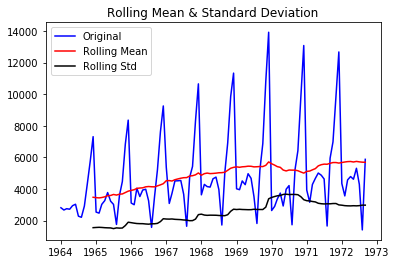

Results of Dickey-Fuller Test:
Test Statistic                 -1.833593
p-value                         0.363916
#Lags Used                     11.000000
Number of Observations Used    93.000000
dtype: float64


In [50]:
test_stationarity(ts2)

# Differencing 

In [51]:
ts1[:5]

Year-Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: International Airlines Pax, dtype: int64

In [52]:
import numpy as np

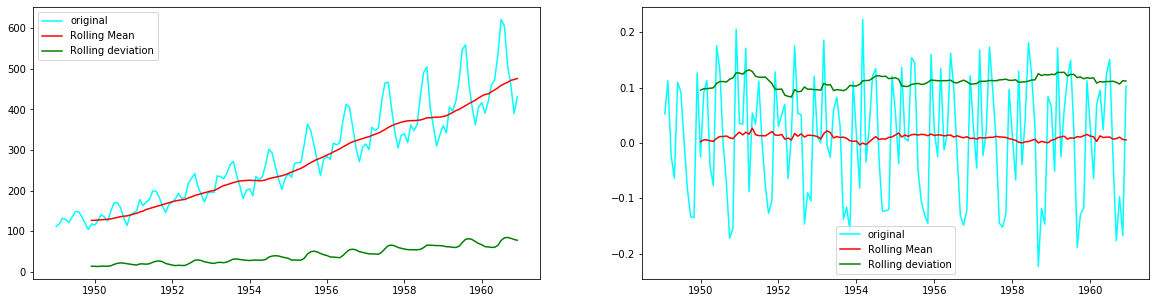

In [53]:
f,ax = plt.subplots(1,2, figsize = (20,5))
rol_mean = ts1.rolling(window = 12).mean()
rol_std = ts1.rolling(window = 12).std()
#plt.figure(figsize = (10,5))
ax[0].plot(ts1, color = 'aqua', label = 'original')
ax[0].plot(rol_mean, color = 'red', label = 'Rolling Mean')
ax[0].plot(rol_std, color = 'green', label = 'Rolling deviation')
ax[0].legend(loc = 'best')

ts_log = np.log(ts1)
ts_diff = ts_log.diff()
rol_mean = ts_diff.rolling(window = 12).mean()
rol_std = ts_diff.rolling(window = 12).std()
ax[1].plot(ts_diff, color = 'aqua', label = 'original')
ax[1].plot(rol_mean, color = 'red', label = 'Rolling Mean')
ax[1].plot(rol_std, color = 'green', label = 'Rolling deviation')
ax[1].legend(loc = 'best')
plt.show()

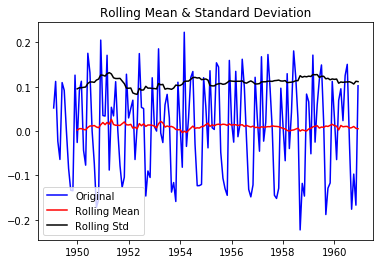

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
dtype: float64


In [54]:
ts_diff2 = ts_diff.dropna()
test_stationarity(ts_diff2)

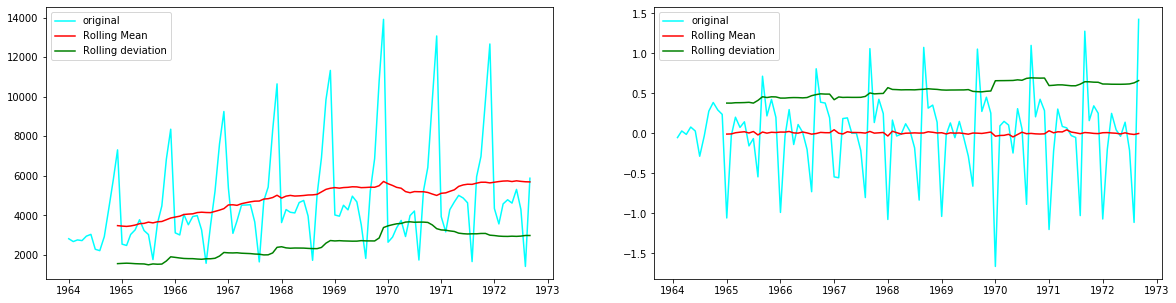

Results of Dickey-Fuller Test:
Test Statistic                 -4.460914
p-value                         0.000231
#Lags Used                     12.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


In [55]:
f,ax = plt.subplots(1,2, figsize = (20,5))
rol_mean = ts2.rolling(window = 12).mean()
rol_std = ts2.rolling(window = 12).std()
#plt.figure(figsize = (10,5))
ax[0].plot(ts2, color = 'aqua', label = 'original')
ax[0].plot(rol_mean, color = 'red', label = 'Rolling Mean')
ax[0].plot(rol_std, color = 'green', label = 'Rolling deviation')
ax[0].legend(loc = 'best')

ts_log = np.log(ts2)
ts_diff = ts_log.diff()
rol_mean = ts_diff.rolling(window = 12).mean()
rol_std = ts_diff.rolling(window = 12).std()
ax[1].plot(ts_diff, color = 'aqua', label = 'original')
ax[1].plot(rol_mean, color = 'red', label = 'Rolling Mean')
ax[1].plot(rol_std, color = 'green', label = 'Rolling deviation')
ax[1].legend(loc = 'best')
plt.show()
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(ts_diff.dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

# Decomposition

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [57]:
def decompose(time_series):
    ts_log = np.log(time_series)
    decompose = seasonal_decompose(ts_log)
    trend = decompose.trend
    seasonal = decompose.seasonal
    irregular = decompose.resid 
    f,ax = plt.subplots(4,1,figsize = (10,10))
    ax[0].plot(ts_log, label = 'Original')
    ax[0].legend(loc ='best')
    ax[1].plot(trend, label = 'trend')
    ax[1].legend(loc ='best')
    ax[2].plot(seasonal, label = 'seasonal')
    ax[2].legend(loc ='best')
    ax[3].plot(irregular, label = 'irregular')
    ax[3].legend(loc ='best')
    plt.show()
    return irregular

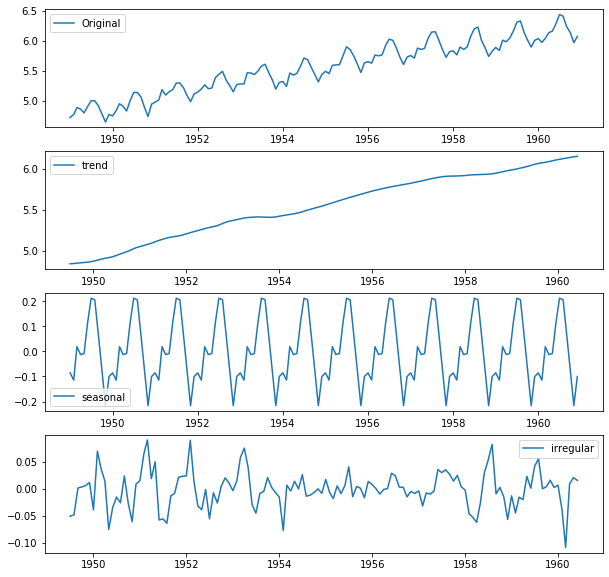

In [58]:
ts_decomposed = decompose(ts1)

In [59]:
ts_decomposed.dropna(inplace = True)

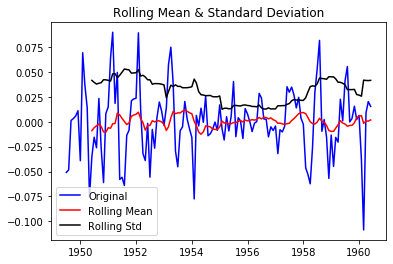

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
dtype: float64


In [60]:
test_stationarity(ts_decomposed)

# Autocorrelation : extent of linear relationship between lagged values of time series

## y(t) and y(t-p)


In [61]:
from statsmodels.tsa.stattools import acf, pacf

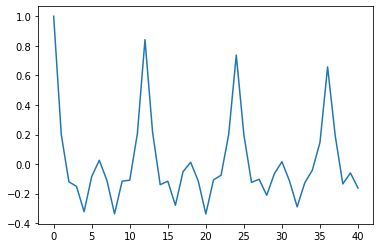

In [62]:
ts_log = np.log(ts1)
ts_diff = ts_log.diff()
lag_acf = acf(ts_diff.dropna())
plt.plot(lag_acf)
plt.show()

In [63]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

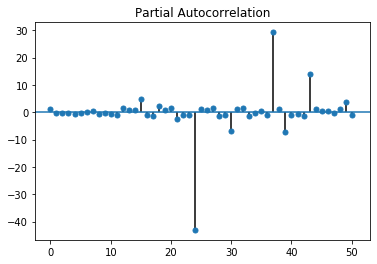

In [64]:
plot_pacf(np.log(ts2).diff().dropna(),lags= 50)
plt.show()

In [65]:
from statsmodels.tsa.arima_model import ARIMA

In [66]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |

In [67]:
ts_log = np.log(ts2)
ts_diff = ts_log.diff()

/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


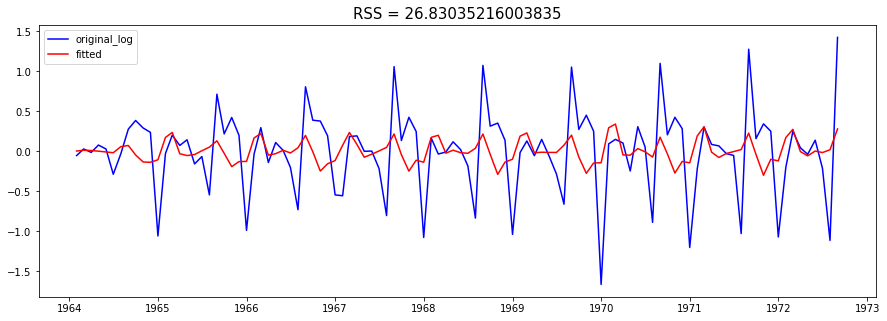

In [68]:
# AR model ( q = 0)
model = ARIMA(ts_log, order = (2,1,0))
results = model.fit(disp = -1)
plt.figure(figsize = (15,5))
plt.plot(ts_diff, color = 'blue', label = 'original_log')
plt.plot(results.fittedvalues, color = 'red', label = 'fitted')
plt.legend(loc = 'best')
RSS = sum((results.fittedvalues - ts_diff.dropna())**2)
plt.title('RSS = {}'.format(RSS), fontsize = 15)
plt.show()



/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


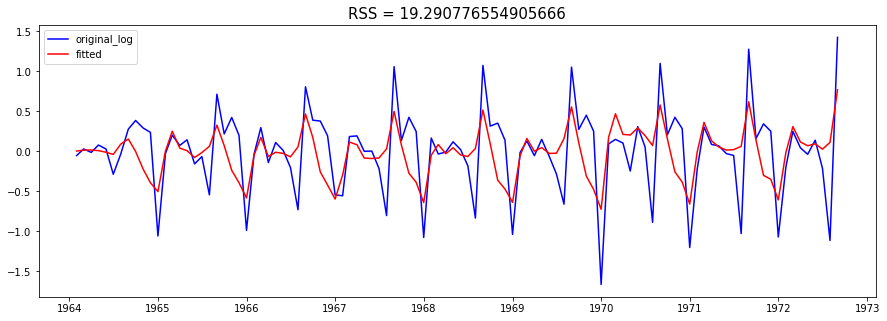

In [69]:
# MA model ( p = 0)
model = ARIMA(ts_log, order = (0,1,2))
results = model.fit(disp = -1)
plt.figure(figsize = (15,5))
plt.plot(ts_diff, color = 'blue', label = 'original_log')
plt.plot(results.fittedvalues, color = 'red', label = 'fitted')
plt.legend(loc = 'best')
RSS = sum((results.fittedvalues - ts_diff.dropna())**2)
plt.title('RSS = {}'.format(RSS), fontsize = 15)
plt.show()
plt.show()

/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


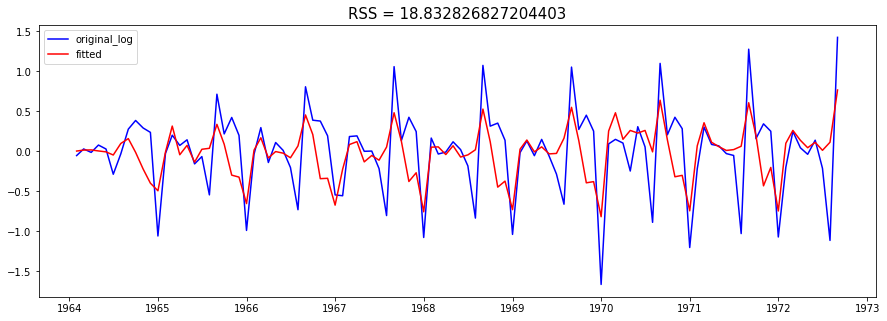

In [70]:
# MA model
model = ARIMA(ts_log, order = (2,1,2))
results = model.fit(disp = -1)
plt.figure(figsize = (15,5))
plt.plot(ts_diff, color = 'blue', label = 'original_log')
plt.plot(results.fittedvalues, color = 'red', label = 'fitted')
plt.legend(loc = 'best')
RSS = sum((results.fittedvalues - ts_diff.dropna())**2)
plt.title('RSS = {}'.format(RSS), fontsize = 15)
plt.show()
plt.show()

# ARIMA model

/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/shivasagar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


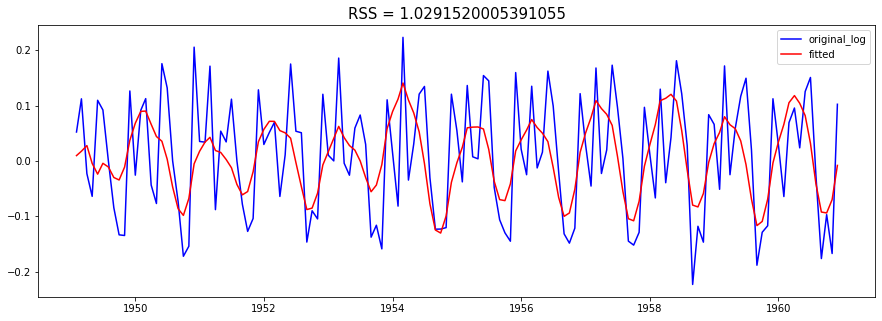

In [71]:
ts_log = np.log(ts1)
ts_diff = ts_log.diff()
model = ARIMA(ts_log, order = (2,1,2))
results = model.fit(disp = -1)
plt.figure(figsize = (15,5))
plt.plot(ts_diff, color = 'blue', label = 'original_log')
plt.plot(results.fittedvalues, color = 'red', label = 'fitted')
plt.legend(loc = 'best')
RSS = sum((results.fittedvalues - ts_diff.dropna())**2)
plt.title('RSS = {}'.format(RSS), fontsize = 15)
plt.show()


In [72]:
## prediction / forecast 

In [73]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Year-Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [74]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Year-Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [75]:
ts_log.iloc[0]

4.718498871295094

In [76]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log.head()

Year-Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
dtype: float64

In [77]:
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Year-Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

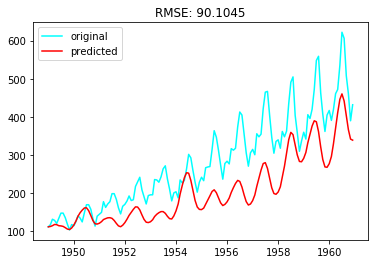

In [78]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts1, color = 'aqua', label = 'original')
plt.plot(predictions_ARIMA, color = 'red', label='predicted')
plt.legend(loc='best')
#plt.plot(results.fittedvalues, color = 'green')

plt.title('RMSE: {:.4f}'.format( np.sqrt(sum((predictions_ARIMA-ts1)**2)/len(ts1))))
plt.show()